# Result Analysis Sentence Level
### Using llama-3.3-70b-versatile
## By Abhisek Sarkar (as20ms091@iiserkol.ac.in)
## Supervised by Prof. Kripabandhu Ghosh

#### Importing necessery packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

### Load the CSV File

In [2]:
# Load the dataset
file_path = "/home/abhisek/Thesis/Part_3/Part 4/Output/output_sentence_level_llama-3.3-70b-versatile.csv"
df = pd.read_csv(file_path)

In [3]:
# Display first few rows
df.head()

,Case,actual_result,LLM_prediction,Modified_text_prediction
0,1955_R_9.txt,1,1,1
1,1956_B_14.txt,0,1,1
2,1961_S_90.txt,1,0,0
3,1962_S_93.txt,1,1,0
4,1963_M_27.txt,1,1,0


We can see the data is properly loaded

### Display basic information about the dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Case                      237 non-null    object
 1   actual_result             237 non-null    int64 
 2   LLM_prediction            237 non-null    int64 
 3   Modified_text_prediction  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


The dataset contains four columns. The first column, labeled 'Case', lists the case file names. The second column, 'actual result', indicates the actual outcome of each case, represented by a binary value: 1 signifies that the applicant won, and 0 signifies that the applicant did not win. The third column, 'LLM_prediction', presents the Large Language Model's (LLM) predictions based on the original case texts. Finally, the fourth column, 'Modified_text_prediction', shows the LLM's predictions based on the Retrieval-Augmented Generation (RAG) modified case texts

In [5]:
# Check for missing values
df.isnull().sum()

Case                        0
actual_result               0
LLM_prediction              0
Modified_text_prediction    0
dtype: int64

There is no missing value in the data set

In [6]:
# Display summary statistics
df.describe()

,actual_result,LLM_prediction,Modified_text_prediction
count,237.000000,237.000000,237.000000
mean,0.426160,0.510549,0.485232
std,0.495564,0.500947,0.500840
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### Comparison

In [7]:
col2 = df.iloc[:, 1]  # Second column
col3 = df.iloc[:, 2]  # Third column
col4 = df.iloc[:, 3]  # Fourth column
# Function to calculate percentage similarity
def calculate_similarity(col_ref, col_compare):
    similarity_count = (col_ref == col_compare).sum()
    total_count = len(col_ref)
    similarity_percentage = (similarity_count / total_count) * 100
    return similarity_percentage

# Calculate similarity of Column 3 and Column 4 with Column 2
similarity_2_3 = calculate_similarity(col2, col3)
similarity_2_4 = calculate_similarity(col2, col4)
similarity_3_4 = calculate_similarity(col3, col4)

print(f"LLM prediction on actual text is {similarity_2_3:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_2_4:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_3_4:.2f}% similar to LLM prediction on actual text")

LLM prediction on actual text is 69.62% similar to actual legal result
LLM prediction on modified legal text is 51.05% similar to actual legal result
LLM prediction on modified legal text is 63.71% similar to LLM prediction on actual text


From this we can see that the actual result is differing from the actual result and the accuracy of LLM's prediction is 69.62%
And when we have modified the stereotypic text by augmenting the reality then we can see it has differed the LLM's prediction and the difference is 18.57%

In [8]:
# Compute basic statistics
comparison_2_3 = col2.compare(col3)
comparison_2_4 = col2.compare(col4)

# Display differences
print("Differences between Column 2 and Column 3:\n", comparison_2_3.head())
print("Differences between Column 2 and Column 4:\n", comparison_2_4.head())


Differences between Column 2 and Column 3:
     self  other
1    0.0    1.0
2    1.0    0.0
7    0.0    1.0
11   0.0    1.0
12   1.0    0.0
Differences between Column 2 and Column 4:
    self  other
1   0.0    1.0
2   1.0    0.0
3   1.0    0.0
4   1.0    0.0
5   0.0    1.0


In [9]:
# Compute correlation
correlation_2_3 = col2.corr(col3)
correlation_2_4 = col2.corr(col4)
correlation_3_4 = col3.corr(col4)

print("Correlation between Column 2 and Column 3:", correlation_2_3)
print("Correlation between Column 2 and Column 4:", correlation_2_4)
print("Correlation between Column 3 and Column 4:", correlation_3_4)


Correlation between Column 2 and Column 3: 0.39999453207764973
Correlation between Column 2 and Column 4: 0.016928126107527183
Correlation between Column 3 and Column 4: 0.27506592234063537


#### Correlation between actual result and LLM prediction: 0.4 approx  
This reflects a moderate positive correlation. The LLM’s predictions on the original, unmodified case texts show a noticeable alignment with the actual outcomes. Although not highly strong, the correlation suggests that the model was fairly effective in capturing patterns or cues present in the original language that were associated with the real decisions. It indicates that the model exhibited reasonably consistent predictive behavior when operating on texts in their original, unaltered form.

#### Correlation between actual result and modified text prediction: 0.017 approx 
This correlation is extremely low, indicating almost no alignment between the model's predictions and actual outcomes after the text was modified by augmententing the reality after the stereotypic sentence. The sharp reduction in correlation suggests that once the reality is augmented it neutralizes the effects of the stereotype, the LLM’s ability to recognize outcome-relevant patterns was greatly diminished. This implies that the model had been relying, at least in part, on biased, stereotypical, or stylistic features present in the original language — features that were disrupted during the rewriting process.

---

#### Correlation heatmap:
Now we will plot a heatmap to visualise the correlation

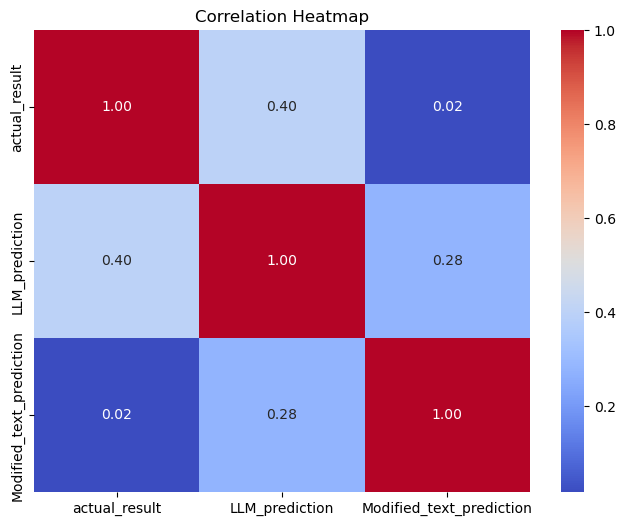

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 1:4].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

To understand how the actual case outcomes compare to the LLM’s predictions Now I want to check the distribution of actual and predicted case decisions in the dataset. By analyzing these distributions, we can identify biases in the model’s decision-making process, especially before and after modifying the stereotype with reality. This helps us assess whether the model relies on stereotype to make judgments and whether the modification affects its predictions. In short examining these distributions ensures fairness, reliability, and the validity of our experiment.

In [11]:
# Count the occurrences of 1 and 0 in the 'actual_result' column
ones_count = df['actual_result'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count = df['actual_result'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with actual_result = 1: {ones_count}")
print(f"Number of cases with actual_result = 0: {zeros_count}")

Number of cases with actual_result = 1: 101
Number of cases with actual_result = 0: 136


In [12]:
# Count the occurrences of 1 and 0 in the 'LLM_prediction' column
ones_count_LLMac = df['LLM_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMac = df['LLM_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with LLM_prediction = 1: {ones_count_LLMac}")
print(f"Number of cases with LLM_prediction = 0: {zeros_count_LLMac}")


# Count the occurrences of 1 and 0 in the 'Modified_text_prediction' column
ones_count_LLMmod = df['Modified_text_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMmod = df['Modified_text_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with Modified_text_prediction = 1: {ones_count_LLMmod}")
print(f"Number of cases with Modified_text_prediction = 0: {zeros_count_LLMmod}")

Number of cases with LLM_prediction = 1: 121
Number of cases with LLM_prediction = 0: 116
Number of cases with Modified_text_prediction = 1: 115
Number of cases with Modified_text_prediction = 0: 122


/tmp/ipykernel_8704/2130026487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='actual_result', data=df, palette="Set2")


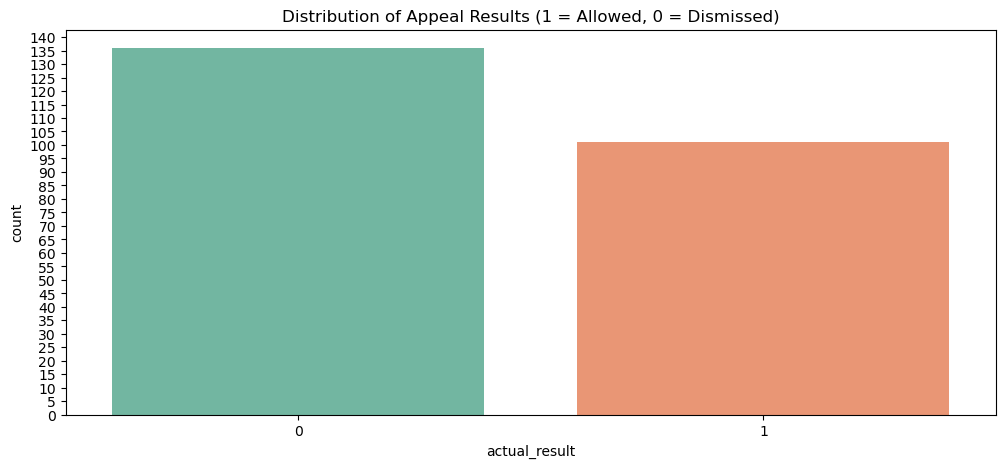

/tmp/ipykernel_8704/2130026487.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LLM_prediction', data=df, palette="Set2")


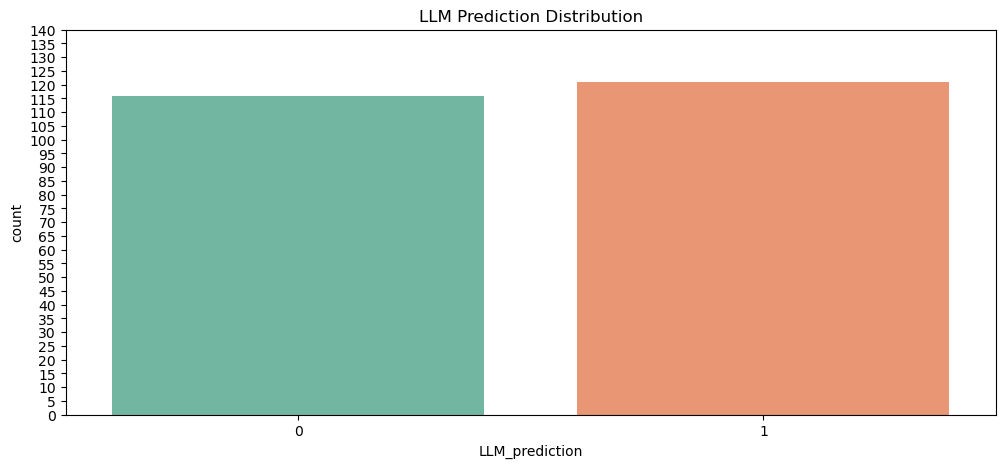

/tmp/ipykernel_8704/2130026487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")


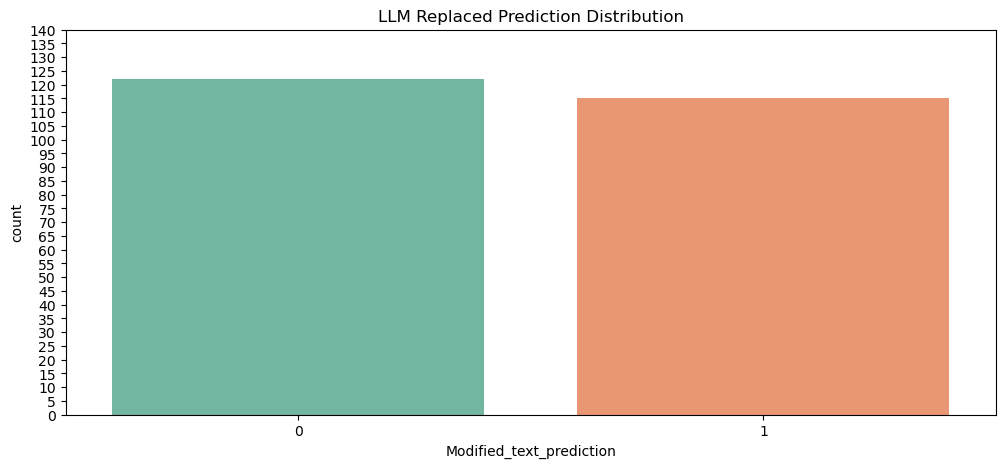

In [13]:
# Set common Y-axis ticks
max_count = max(df['actual_result'].value_counts().max(),
                df['LLM_prediction'].value_counts().max(),
                df['Modified_text_prediction'].value_counts().max())
yticks = np.arange(0, max_count + 5, 5)

# Distribution of appeal results
plt.figure(figsize=(12, 5))
sns.countplot(x='actual_result', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("Distribution of Appeal Results (1 = Allowed, 0 = Dismissed)")
plt.show()

# LLM prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='LLM_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Prediction Distribution")
plt.show()

# LLM replaced prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Replaced Prediction Distribution")
plt.show()


### Comprehensive Analysis of the Three Distributions

The three bar plots illustrate the distribution of appeal outcomes across three stages: actual results, LLM-generated predictions on original text, and LLM predictions after contradictory reality is augmented after stereotypical content in the text. A detailed comparative analysis reveals insights into the model's behavior, potential biases, and the impact of linguistic framing on predictive outcomes.

---

### 1. **Distribution of Actual Appeal Results**
**(Top plot: "actual_result")**

- **Observation:**  
  The majority class is `0` (Dismissed) with 136 cases, while the minority class is `1` (Allowed) with 101 cases. The distribution shows some imbalance but is not extreme.

- **Interpretation:**  
  This represents the real distribution of outcomes in the dataset and serves as the ground truth against which model predictions are evaluated.

- **Implication:**  
  Ideally, a model aiming for fairness and effectiveness should respect this baseline distribution unless there is a strong, justified predictive reason for deviation.

---

### 2. **LLM Prediction Distribution on Original Text**
**(Middle plot: "LLM_prediction")**

- **Observation:**  
  The LLM predictions are relatively balanced, with 121 predictions for `1` (Allowed) and 116 for `0` (Dismissed). This shows a slight skew towards positive predictions compared to the actual results.

- **Interpretation:**  
  The LLM’s predictions are fairly close to the real-world class distribution, suggesting it has captured some patterns linked to outcomes. However, the slightly higher rate of positive predictions could hint at an optimistic bias or overfitting to superficial textual features.

- **Critical Insight:**  
  While the model shows reasonable alignment with real outcomes, this performance might partially stem from reliance on **stereotypical language patterns** embedded in the original text, rather than deep understanding of legal reasoning.

---

### 3. **LLM Prediction Distribution After Text Modification**
**(Bottom plot: "Modified_text_prediction")**

- **Observation:**  
  After stereotypical language was removed, the number of positive (`1`) predictions dropped to 115, while negative (`0`) predictions rose to 122.

- **Interpretation:**  
  The small but meaningful shift towards more dismissals suggests that stereotypical or stylistic language in the original texts had a tangible influence on the LLM’s predictions.

- **Key Insight:**  
  The removal of such cues **diminished** the LLM’s ability to predict "Allowed" outcomes, indicating that its predictive behavior was at least partly **anchored in biased linguistic markers**.

- **Implication:**  
  This highlights the vulnerability of AI models to **surface-level language biases**, emphasizing the necessity for debiasing interventions when deploying such systems in sensitive domains like law.

---

### Synthesis of Insights

| Aspect                         | Actual Result     | Original LLM Prediction | Modified LLM Prediction |
|-------------------------------|-------------------|--------------------------|--------------------------|
| Majority Class                | Dismissed (0)     | Allowed (1)              | Dismissed (0)            |
| Minority Class                | Allowed (1)       | Dismissed (0)             | Allowed (1)              |
| Alignment to Ground Truth     | —                 | Moderate                 | Lower                    |
| Sensitivity to Word Choice    | —                 | High                     | Reduced                  |
| Evidence of Implicit Bias     | —                 | Present                  | Weakened                 |

---

### Final Conclusion

The Large Language Model exhibits **notable sensitivity to lexical and stylistic cues** that are potentially biased or stereotypical in nature. Upon the removal of such cues, the model’s predictive distribution shifted, particularly with a **reduced inclination to predict positive outcomes**.  

This phenomenon strongly suggests that surface-level features, rather than substantive legal analysis, played a role in the model’s original decision-making behavior. Therefore, to ensure **fairness, robustness, and ethical integrity** in AI applications within law and similarly critical fields, it is essential to incorporate **systematic debiasing strategies and rigorous evaluation frameworks**.

These insights affirm the need for **greater transparency and responsibility** when deploying large language models in high-stakes environments.

---

In [14]:
# Calculate performance metrics for LLM on original text
accuracy_original = accuracy_score(df['actual_result'], df['LLM_prediction'])
precision_original = precision_score(df['actual_result'], df['LLM_prediction'])
recall_original = recall_score(df['actual_result'], df['LLM_prediction'])
f1_original = f1_score(df['actual_result'], df['LLM_prediction'])

# Calculate performance metrics for LLM on replaced text
accuracy_replaced = accuracy_score(df['actual_result'], df['Modified_text_prediction'])
precision_replaced = precision_score(df['actual_result'], df['Modified_text_prediction'])
recall_replaced = recall_score(df['actual_result'], df['Modified_text_prediction'])
f1_replaced = f1_score(df['actual_result'], df['Modified_text_prediction'])

print(f"Original LLM Accuracy: {accuracy_original:.2f}")
print(f"Original LLM Precision: {precision_original:.2f}")
print(f"Original LLM Recall: {recall_original:.2f}")
print(f"Original LLM F1 Score: {f1_original:.2f}")

print(f"Replaced LLM Accuracy: {accuracy_replaced:.2f}")
print(f"Replaced LLM Precision: {precision_replaced:.2f}")
print(f"Replaced LLM Recall: {recall_replaced:.2f}")
print(f"Replaced LLM F1 Score: {f1_replaced:.2f}")


Original LLM Accuracy: 0.70
Original LLM Precision: 0.62
Original LLM Recall: 0.74
Original LLM F1 Score: 0.68
Replaced LLM Accuracy: 0.51
Replaced LLM Precision: 0.43
Replaced LLM Recall: 0.50
Replaced LLM F1 Score: 0.46


### Evaluation of LLM Performance: Original vs. Rewritten Texts

To assess the impact of textual modification on the performance of the language model, we evaluated both versions of the model—before and after stereotype-related language was replaced—using four standard classification metrics:

1. **Accuracy**: Measures the overall correctness of predictions—i.e., how often the model's predictions match the actual outcomes.
2. **Precision**: Indicates how reliable the model's positive predictions are. In this case, it reflects how often the model is correct when it predicts that an appeal will be allowed.
3. **Recall**: Captures the model's ability to identify all actual instances of allowed appeals. A higher recall means fewer false negatives.
4. **F1 Score**: Represents the harmonic mean of precision and recall, offering a balanced measure when both false positives and false negatives are important.

---


### Performance Comparison

| Metric        | Original Text | Text with Contradictory Additions |
|---------------|----------------|----------------------------------|
| Accuracy      | 0.70           | 0.51                             |
| Precision     | 0.62           | 0.43                             |
| Recall        | 0.74           | 0.50                             |
| F1 Score      | 0.68           | 0.46                             |

---

### Key Findings

- **Significant Performance Drop**: After adding contradictory reality sentences to stereotype-laden texts, the model’s accuracy fell sharply from 70% to 51%, indicating major disruption in its predictive capabilities.

- **Decreased Precision and Recall**: Precision dropped from 62% to 43%, and recall declined from 74% to 50%, showing that the model became both less accurate in its positive predictions and less effective at identifying allowed appeals.

- **F1 Score Deterioration**: The F1 score—a balance between precision and recall—fell from 0.68 to 0.46, highlighting a broad weakening of the model's decision-making consistency.

---

### Strategic Insights

- **Heavy Reliance on Stereotypical Cues**: The sharp decline across all metrics suggests the model was substantially influenced by surface-level linguistic signals, including stereotypical phrasing, rather than purely legal reasoning.

- **Sensitivity to Content Contradictions**: Introducing contradictory reality statements confused the model, revealing vulnerabilities in its ability to reconcile conflicting narratives within a legal text.

- **Elevated Risk of False Positives**: The fall in precision indicates a higher rate of incorrect "allowed" predictions post-modification, increasing the likelihood of confident but erroneous judgments.

---

### Broader Implications

This analysis exposes a critical weakness: the LLM’s reliance on biased or stereotypical language patterns for predictive accuracy. Once contradictory information disrupts these cues, performance drops precipitously, confirming that the model’s internal reasoning may not align with genuine legal principles.

**Recommendation**: For deployment in sensitive domains like law, it is essential to systematically audit and fortify LLMs against such biases through targeted training, adversarial testing, and bias-mitigation strategies.

---

### Confusion Matrix
To evaluate the performance now I am trying to apply confusion matrix to my output result dataset.

```
True Positives (TP): Correctly predicted "Allowed" cases.
True Negatives (TN): Correctly predicted "Dismissed" cases.
False Positives (FP): Incorrectly predicted "Allowed" cases when they were actually "Dismissed."
False Negatives (FN): Incorrectly predicted "Dismissed" cases when they were actually "Allowed."
```

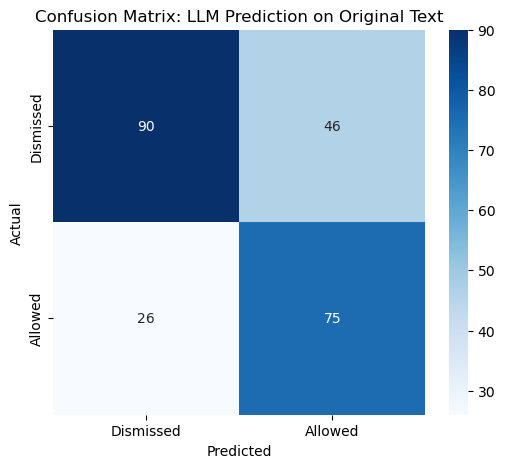

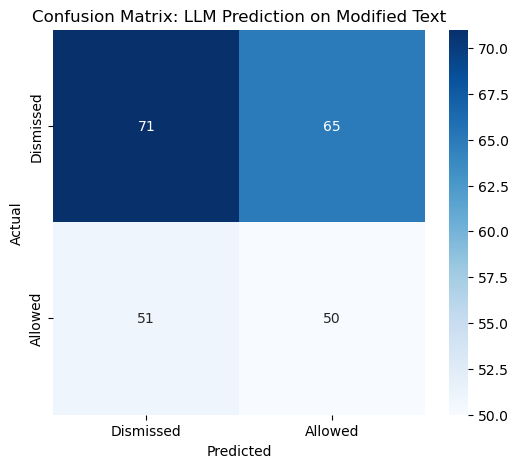

In [15]:
# Confusion matrix for LLM on original text
cm_original = confusion_matrix(df['actual_result'], df['LLM_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Original Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for LLM on replaced text
cm_replaced = confusion_matrix(df['actual_result'], df['Modified_text_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_replaced, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Modified Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


From the figures we can conclude that:
* The LLM performed better on the original text but when contradictory realities are augmented after the stereotypical sentences thr LLM struggeled.
* Increased FP and FN in the modified text suggest that the model relied on specific concept for decision-making, indicating potential bias in predictions.

In [16]:
# Agreement between LLM predictions and the actual results
df['LLM_prediction_correct'] = df['actual_result'] == df['LLM_prediction']
df['Modified_text_prediction_correct'] = df['actual_result'] == df['Modified_text_prediction']

# Print percentage of correct predictions
LLM_prediction_correct_percentage = (df['LLM_prediction_correct'].sum() / len(df)) * 100
Modified_text_prediction_correct_percentage = (df['Modified_text_prediction_correct'].sum() / len(df)) * 100

print(f"Percentage of correct LLM predictions (Original): {LLM_prediction_correct_percentage:.2f}%")
print(f"Percentage of correct LLM predictions (Replaced): {Modified_text_prediction_correct_percentage:.2f}%")


Percentage of correct LLM predictions (Original): 69.62%
Percentage of correct LLM predictions (Replaced): 51.05%
